# 2. Первичный анализ

Общий временной интервал будем искать относительно временного интрвала индекса IMOEX

### Импорт библиотек

In [29]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option("display.max_columns", 50)

import numpy as np

import seaborn as sns
sns.set_style("darkgrid")  
sns.set_context("talk", font_scale=0.6)

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update(
    {"lines.linewidth": 1, "patch.facecolor": "#ebe3df", "axes.facecolor": "#ebe3df"})

from tqdm import tqdm
from tqdm import tqdm_notebook

import math

### Импорт пользовательской библиотеки

In [ ]:
%load_ext autoreload
%autoreload 2

import sys

# setting path
sys.path.append('..')

# importing
from my_lib import *

In [32]:
def ts_first_view(df):
    ticker = df['SECID'][0]
    print(f'####################################################################')
    print(f'_________________________{ticker}___________________________________')
    print(f'####################################################################')
    display(df.head(3))
    display(df.tail(3))
    plot_data(df['CLOSE'], title=f'График цены {ticker}')
    
    plot_timeStamps(df['CLOSE'])

## 2.1 Загрузка данных

Объединим все исторические данные в один датает по временному интервалу

In [33]:
df_common = pd.read_pickle(f'../data/parsing/ticker_IMOEX.pkl')[['CLOSE']]
df_common.columns = ['IMOEX']

df_tikers = pd.read_pickle('../data/frames/df_tikers_selected.pkl')
tickers_list = list(df_tikers['TRADE_CODE'])

for ticker in tqdm_notebook(tickers_list):
    try:
        df_ticker = pd.read_pickle(f'../data/parsing/ticker_{ticker}.pkl')
        df_ticker[f'{ticker}'] = df_ticker['CLOSE']

        df_common = pd.concat([df_common, df_ticker[f'{ticker}']], axis=1)
    except:
        print(f'fail whith ticker: {ticker}')

  0%|          | 0/66 [00:00<?, ?it/s]

Посмострим на получившийся датасет

In [24]:
df_common

,IMOEX,CBOM,CIAN,ETLN,FIXP,GLTR,HHRU,MDMG,OKEY,OZON,YNDX,AGRO,FIVE,ALRS,VTBR,GEMC,VKCO,LENT,RUAL,TCSG,ENPG,BSPB,AQUA,AFKS,AFLT,...,PLZL,RTKM,RTKMP,SBER,SBERP,CHMF,SELG,SVCB,FLOT,TGKA,TRNFP,HYDR,FEES,PHOR,ELFV,SFIN,UPRO,SGZH,RNFT,MSNG,SMLT,NVTK,ROSN,TATN,TATNP
TRADEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1997-09-22,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-09-23,100.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-09-24,99.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-09-25,99.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-09-26,98.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,3266.66,8.047,699.8,97.66,307.7,682.80,3381.0,977.9,29.16,3270.0,3539.4,1424.6,2610.0,72.23,0.023655,930.3,657.4,768.0,34.550,NaN,437.6,298.66,892.0,18.390,39.06,...,11005.0,93.06,80.10,295.38,294.70,1671.2,64.33,19.280,135.19,0.009534,1590.0,0.7613,0.12172,6792.0,0.6630,1550.0,2.196,3.938,156.6,3.4020,3683.0,1348.0,577.45,717.3,713.8
2024-03-04,3296.75,7.952,706.8,97.64,309.3,674.50,3414.0,985.6,30.49,3397.5,3700.6,1402.0,2699.5,73.56,0.023780,947.5,660.0,762.5,34.765,NaN,452.0,297.38,899.0,18.541,39.78,...,11592.0,91.70,79.65,299.17,299.38,1670.8,66.31,19.170,136.23,0.009692,1585.0,0.7721,0.12390,6757.0,0.6680,1632.0,2.181,3.963,158.4,3.3910,3737.0,1337.8,582.50,732.5,724.2
2024-03-05,3300.89,8.008,727.0,96.98,307.1,668.75,3631.0,997.2,30.30,3334.0,3627.0,1392.0,2673.0,73.62,0.023505,948.0,658.4,756.5,34.550,NaN,444.6,295.77,894.0,18.531,39.78,...,11365.5,91.39,80.20,298.40,298.88,1679.2,66.80,19.280,135.45,0.009666,1604.5,0.7667,0.12232,6811.0,0.6636,1659.8,2.166,3.940,154.8,3.4010,3701.5,1343.2,585.55,730.4,724.9


Посмотрим на некоторые ряды:

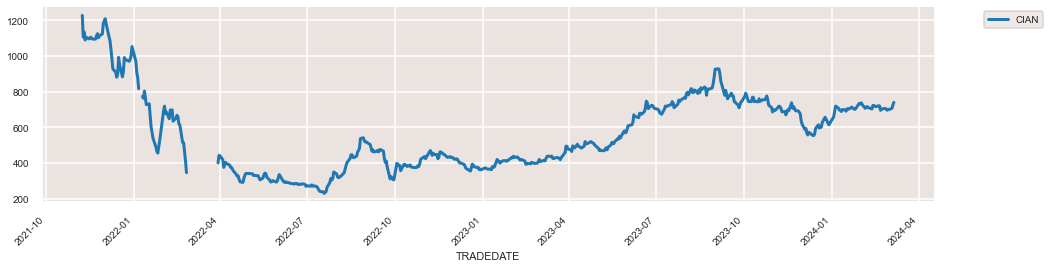

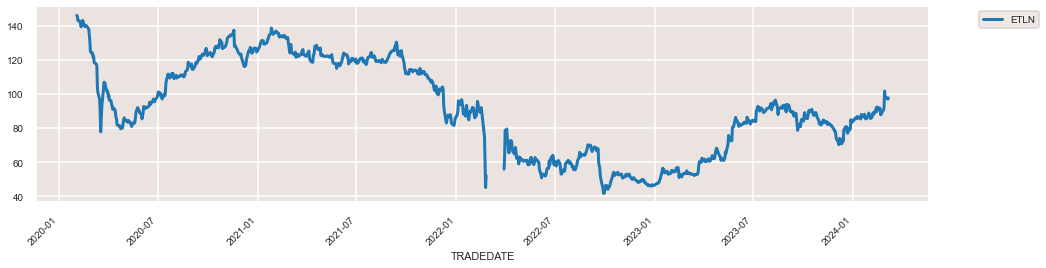

In [19]:
for ticker in tickers_list[1:3]:
    plot_data(df_common[ticker])

## 2.2 Отбор временного интервала

Очевидно наличие значительных по размеру пустот по пересечению временных интервалов наблюдений. 

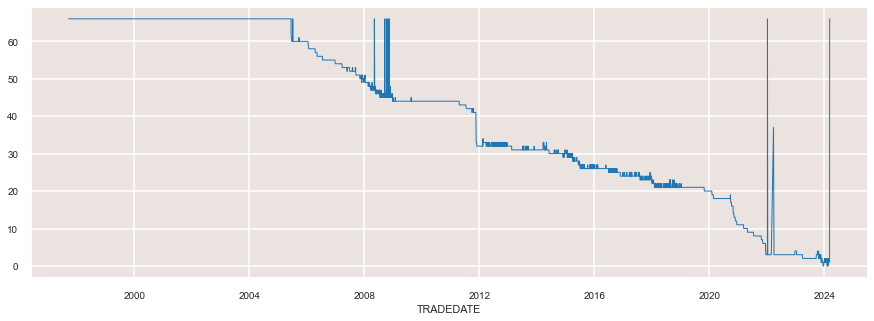

In [27]:
plt.figure(figsize=(15,5))
g = sns.lineplot(data = df_common.isnull().sum(axis=1))

По графику видим, что резко возрастает количество наблюдаемых рядов начиная с 2012 года.

Учитывая наличие кризисов в 2008 г., 2014 г. и 2022 г., посмотрим поближе на промежуток с 2015 по 2021 годы.

<AxesSubplot:xlabel='TRADEDATE'>

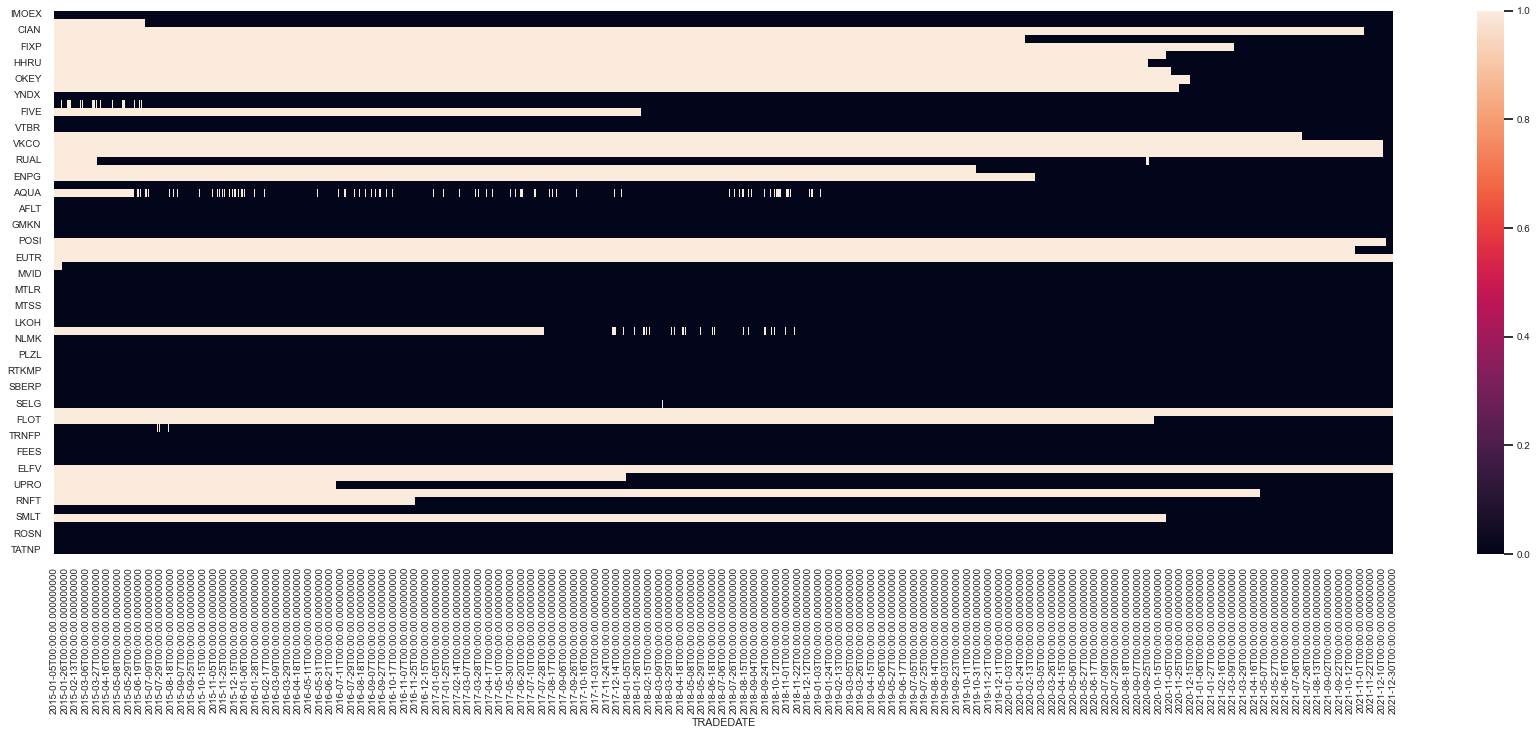

In [27]:
df_common.loc['2015':'2021'].isnull().T
plt.figure(figsize=(30,10))
sns.heatmap(df_common.loc['2015':'2021'].isnull().T)

Остановимся на выбранном промежутке. Все наблюдения (тикеры), по которым отсутствуют данные в этот промежуток - удалим

In [28]:
drop_list = []
save_list = []
for col in df_common.columns:
    mis_number = df_common.loc['2015':'2021'][col].isnull().iloc[-7:].sum() \
    + df_common.loc['2015':'2021'][col].isnull().iloc[:7].sum()
    
    if mis_number > 5:
        drop_list.append(col)
    else:
        save_list.append(col)
        
print('Удаляемые тикеры: ', drop_list, '\n')
print('Сохраняемые тикеры: ', save_list)

Удаляемые тикеры:  ['CBOM', 'CIAN', 'ETLN', 'FIXP', 'GLTR', 'HHRU', 'MDMG', 'OKEY', 'OZON', 'FIVE', 'GEMC', 'VKCO', 'LENT', 'RUAL', 'TCSG', 'ENPG', 'AQUA', 'POSI', 'RENI', 'EUTR', 'IRAO', 'BELU', 'SVCB', 'FLOT', 'ELFV', 'SFIN', 'UPRO', 'SGZH', 'RNFT', 'SMLT'] 

Сохраняемые тикеры:  ['IMOEX', 'YNDX', 'AGRO', 'ALRS', 'VTBR', 'BSPB', 'AFKS', 'AFLT', 'GAZP', 'GMKN', 'LSRG', 'MVID', 'MAGN', 'MTLR', 'MTLRP', 'MTSS', 'MOEX', 'LKOH', 'NLMK', 'PIKK', 'PLZL', 'RTKM', 'RTKMP', 'SBER', 'SBERP', 'CHMF', 'SELG', 'TGKA', 'TRNFP', 'HYDR', 'FEES', 'PHOR', 'MSNG', 'NVTK', 'ROSN', 'TATN', 'TATNP']


In [29]:
df_selected = df_common.drop(columns=drop_list).loc['2015':'2021']
display(df_selected.head())
display(df_selected.tail())

,IMOEX,YNDX,AGRO,ALRS,VTBR,BSPB,AFKS,AFLT,GAZP,GMKN,LSRG,MVID,MAGN,MTLR,MTLRP,MTSS,MOEX,LKOH,NLMK,PIKK,PLZL,RTKM,RTKMP,SBER,SBERP,CHMF,SELG,TGKA,TRNFP,HYDR,FEES,PHOR,MSNG,NVTK,ROSN,TATN,TATNP
TRADEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-05,1435.66,1079.0,280.0,60.38,0.06750,24.60,12.25,33.21,133.95,8590.0,473.0,135.5,11.279,24.97,16.60,174.70,60.40,2295.0,66.285,191.7,1000.5,91.44,57.95,56.37,38.59,522.00,4.595,0.004840,130100.0,0.5656,0.04713,1784.0,0.6520,455.5,196.75,238.00,134.7
2015-01-06,1480.73,1092.0,310.0,61.28,0.06666,25.60,12.37,33.07,138.92,9101.0,473.0,146.0,11.550,25.30,17.29,179.90,61.90,2345.0,66.700,198.9,1047.0,95.28,58.11,58.28,39.50,556.90,4.500,0.004955,142990.0,0.5684,0.04850,1855.0,0.6625,476.7,200.30,228.75,135.3
2015-01-08,1547.39,1094.0,335.0,60.20,0.06741,26.50,12.60,35.17,146.46,9550.0,480.0,148.5,12.350,26.40,17.84,190.05,61.90,2572.0,67.410,191.2,1060.0,90.10,57.30,65.70,43.75,542.70,4.595,0.005000,130000.0,0.5772,0.05030,1776.0,0.6860,483.0,214.95,245.00,136.0
2015-01-09,1515.37,1098.0,306.0,61.91,0.06531,26.15,12.61,34.00,141.70,9740.0,489.0,145.9,12.100,26.50,17.67,195.00,60.14,2461.0,67.900,192.7,1050.0,89.03,57.30,63.10,42.90,548.55,4.555,0.004880,120820.0,0.5498,0.04897,1798.0,0.6860,475.1,206.60,234.05,134.5
2015-01-12,1513.22,1113.0,303.0,63.00,0.06353,25.70,12.13,34.45,140.22,9839.0,484.0,141.7,11.893,26.40,17.79,193.00,59.59,2477.0,70.120,188.0,1020.0,88.80,56.50,62.90,42.41,558.45,4.650,0.004800,128000.0,0.5451,0.04955,1795.0,0.6825,470.7,204.00,228.25,133.3


,IMOEX,YNDX,AGRO,ALRS,VTBR,BSPB,AFKS,AFLT,GAZP,GMKN,LSRG,MVID,MAGN,MTLR,MTLRP,MTSS,MOEX,LKOH,NLMK,PIKK,PLZL,RTKM,RTKMP,SBER,SBERP,CHMF,SELG,TGKA,TRNFP,HYDR,FEES,PHOR,MSNG,NVTK,ROSN,TATN,TATNP
TRADEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-12-24,3702.72,4424.8,1155.6,115.30,0.047090,82.31,22.325,58.96,338.79,21824.0,578.2,451.1,66.740,119.39,300.75,290.70,149.53,6313.5,212.40,1002.6,13010.0,82.25,75.10,293.89,275.96,1578.0,58.63,0.009720,162600.0,0.7189,0.16596,5619.0,1.9900,1652.6,572.05,482.0,446.1
2021-12-27,3740.63,4467.8,1177.8,116.55,0.047730,82.48,22.556,59.08,343.97,22528.0,583.6,450.0,68.355,122.54,307.35,293.95,151.70,6397.5,214.60,1029.4,13046.0,83.34,75.75,295.68,278.61,1588.6,58.20,0.009744,164000.0,0.7228,0.16596,5767.0,2.0215,1697.6,582.00,490.4,451.9
2021-12-28,3777.56,4482.0,1167.0,119.98,0.048395,83.00,23.600,58.92,343.23,22642.0,593.6,435.5,69.010,124.20,312.60,295.60,151.42,6478.0,215.76,1043.0,12960.5,83.10,75.40,295.00,278.90,1587.6,58.21,0.009800,161300.0,0.7204,0.16380,5798.0,2.0460,1700.0,596.20,496.4,455.7
2021-12-29,3741.07,4418.8,1153.2,121.25,0.048430,83.00,23.530,58.98,340.33,22628.0,603.4,437.0,68.760,121.56,306.50,296.40,152.57,6516.0,215.02,1085.0,12793.0,84.10,75.90,293.51,277.45,1570.4,57.60,0.009896,160300.0,0.7301,0.16178,5866.0,1.9920,1716.8,592.00,495.0,456.4
2021-12-30,3787.26,4569.4,1173.0,122.34,0.048195,81.50,23.364,59.16,342.39,22900.0,609.0,437.7,69.650,123.29,313.55,298.90,153.22,6573.0,217.04,1102.4,13087.0,86.63,76.15,293.49,279.00,1604.2,57.71,0.009938,158800.0,0.7435,0.16268,5863.0,2.0980,1719.4,599.00,502.0,462.8


Проверим на наличие пропусков в данных

In [30]:
df_selected = df_selected.fillna(method='backfill')
print('Количество missing_values: ', df_selected.isnull().sum().max())

Количество missing_values:  0


Сохраним отобранные данные в отдельный датасет в формате .pkl

In [31]:
df_selected.to_pickle('../data/frames/df_selected.pkl')